<a href="https://colab.research.google.com/github/abigailhtp/Blaze-Praktikum-ML/blob/main/Praktikum_6_Miriam_Stefani_24060122130051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Principal Component Analysis</h2>

<h4><b>Lakukan Principal Component Analysis untuk dataset cars clustering</b></h4>

> Import library dan load dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
filename='cars_clus.csv'
pdf=pd.read_csv(filename)
print('Shape dataset: ', pdf.shape)
pdf.head(5)

Shape dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


> Sebelum melakukan pemrosesan lebih lanjut, dilakukan cleaning terlebih dahulu terhadap data yang memiliki nilai null atau memiliki nilai yang tidak valid

In [3]:
#Data Cleaning
print("Shape of dataset before cleaning: ", pdf.size)
pdf[['sales','resale','type','price','engine_s',
    'horsepow','wheelbas','width','length','curb_wgt','fuel_cap',
     'mpg','lnsales']] = pdf[['sales','resale','type','price','engine_s','horsepow',
                              'wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning:", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


> Banyak data setelah dibersihkan yaitu sebanyak 1872

> Kemudian dilakukan standarisasi data karena PCA dipengaruhi oleh skala sehingga perlu menskalakan fitur dalam data dengan menggunakan StandardScaler untuk menstandarisasi fitur set data ke dalam unit (mean=0 dan variance=1)

> Data yang digunakan untuk standarisasi berupa data numerik

In [7]:
features=['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']

#Separating out the features
x=pdf.loc[:,features].values

#Separating out the target
y=pdf.loc[:,['manufact']].values

#Standardizing the features
x=StandardScaler().fit_transform(x)


> Data asli memiliki 13 kolom. Pada bagian ini kode memproyeksikan data asli yang 13 dimensi menjadi 2 dimensi. Komponen baru hanya dua dimensi utama variasi.

In [8]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents, columns=['principal component 1','principal component 2'])

In [9]:
finalDf=pd.concat([principalDf,pdf[['manufact']]],axis=1)

> Kemudian dilakukan visualisasi proyeksi ke 2D. Tetapi kita perlu tahu apa saja jenis manufact di data tersebut.

In [10]:
manufact=pdf['manufact'].unique()
print("Daftar manufaktur :")
for i, manufaktur in enumerate(manufact,1):
  print(f"{i}. {manufaktur}")

Daftar manufaktur :
1. Acura
2. Audi
3. BMW
4. Buick
5. Cadillac
6. Chevrolet
7. Chrysler
8. Dodge
9. Ford
10. Honda
11. Hyundai
12. Infiniti
13. Jeep
14. Lexus
15. Lincoln
16. Mitsubishi
17. Mercury
18. Mercedes-Benz
19. Nissan
20. Oldsmobile
21. Plymouth
22. Pontiac
23. Porsche
24. Saturn
25. Toyota
26. Volkswagen


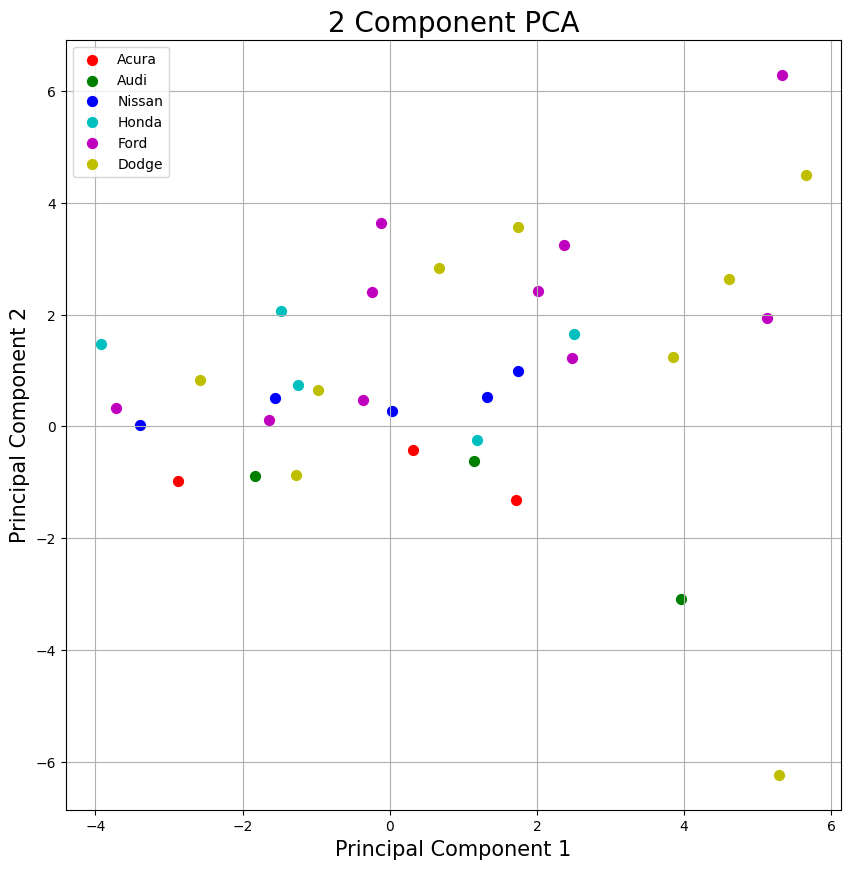

In [17]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)
targets=['Acura', 'Audi','Nissan','Honda', 'Ford', 'Dodge']
colors=['r','g','b','c','m','y']
for target,color in zip(targets,colors):
  indicesToKeep=finalDf['manufact']==target
  ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
             finalDf.loc[indicesToKeep,'principal component 2'],
             c=color, s=50)
ax.legend(targets)
ax.grid()

> Karena target berupa manufaktur dan manufaktur memiliki 26 jenis, maka yang kita gunakan sebagai target disini cukup 6 jenis manufaktur saja.

In [18]:
pca.explained_variance_ratio_

array([0.47403346, 0.24843378])

> Dengan menggunakan explained variance ratio, komponen utama pertama berisi 47,4% varian dan komponen utama kedua berisi 24,84% varian. Bersama-sama, kedua komponen tersebut mengandung 72,24% informasi.